Q2) Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import file
data = pd.read_excel("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Forecasting\\CocaCola_Sales_Rawdata.xlsx",engine='openpyxl')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


#### Transformation


In [3]:
data["Log_Sales"]=np.log(data.Sales)

In [4]:
data.shape

(42, 3)

In [5]:
data["t"]=range(1,43)

In [6]:
data.head()

,Quarter,Sales,Log_Sales,t
0,Q1_86,1734.827000,7.458663,1
1,Q2_86,2244.960999,7.716443,2
2,Q3_86,2533.804993,7.837477,3
3,Q4_86,2154.962997,7.675529,4
4,Q1_87,1547.818996,7.344602,5


In [7]:
data["t_square"]=data.t*data.t
data.head()

,Quarter,Sales,Log_Sales,t,t_square
0,Q1_86,1734.827000,7.458663,1,1
1,Q2_86,2244.960999,7.716443,2,4
2,Q3_86,2533.804993,7.837477,3,9
3,Q4_86,2154.962997,7.675529,4,16
4,Q1_87,1547.818996,7.344602,5,25


In [8]:
data["t_sqrt"]=np.sqrt(data.t)
data.head()

,Quarter,Sales,Log_Sales,t,t_square,t_sqrt
0,Q1_86,1734.827000,7.458663,1,1,1.000000
1,Q2_86,2244.960999,7.716443,2,4,1.414214
2,Q3_86,2533.804993,7.837477,3,9,1.732051
3,Q4_86,2154.962997,7.675529,4,16,2.000000
4,Q1_87,1547.818996,7.344602,5,25,2.236068


In [9]:
data['quarter']=0
for i in range(42):
    q=data['Quarter'][i]
    data['quarter'][i]=q[0:2]+" "+"19"+q[3:5]
data.head()

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1234\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Quarter,Sales,Log_Sales,t,t_square,t_sqrt,quarter
0,Q1_86,1734.827000,7.458663,1,1,1.000000,Q1 1986
1,Q2_86,2244.960999,7.716443,2,4,1.414214,Q2 1986
2,Q3_86,2533.804993,7.837477,3,9,1.732051,Q3 1986
3,Q4_86,2154.962997,7.675529,4,16,2.000000,Q4 1986
4,Q1_87,1547.818996,7.344602,5,25,2.236068,Q1 1987


In [10]:
data['Q']=0
for i in range(42):
    q=data['Quarter'][i]
    data['Q'][i]=q[0:2]

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1234\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
data['year']=0
for i in range(42):
    q=data['Quarter'][i]
    data['year'][i]=int("19"+q[3:5])

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
data['date'] = pd.to_datetime([f'{x[-4:]}{x[:2]}' for x in data['quarter']])

In [13]:
data.tail()

,Quarter,Sales,Log_Sales,t,t_square,t_sqrt,quarter,Q,year,date
37,Q2_95,4936.0,8.504311,38,1444,6.164414,Q2 1995,Q2,1995,1995-04-01
38,Q3_95,4895.0,8.495970,39,1521,6.244998,Q3 1995,Q3,1995,1995-07-01
39,Q4_95,4333.0,8.374015,40,1600,6.324555,Q4 1995,Q4,1995,1995-10-01
40,Q1_96,4194.0,8.341410,41,1681,6.403124,Q1 1996,Q1,1996,1996-01-01
41,Q2_96,5253.0,8.566555,42,1764,6.480741,Q2 1996,Q2,1996,1996-04-01


In [14]:
# Create dummy variable by using one hot encoding method 
Q_dummy=pd.get_dummies(data['Q'])
Q_dummy=pd.DataFrame(Q_dummy)
Q_dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [15]:
data1=data.join(Q_dummy)
data1.head()

,Quarter,Sales,Log_Sales,t,t_square,t_sqrt,quarter,Q,year,date,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,7.458663,1,1,1.000000,Q1 1986,Q1,1986,1986-01-01,1,0,0,0
1,Q2_86,2244.960999,7.716443,2,4,1.414214,Q2 1986,Q2,1986,1986-04-01,0,1,0,0
2,Q3_86,2533.804993,7.837477,3,9,1.732051,Q3 1986,Q3,1986,1986-07-01,0,0,1,0
3,Q4_86,2154.962997,7.675529,4,16,2.000000,Q4 1986,Q4,1986,1986-10-01,0,0,0,1
4,Q1_87,1547.818996,7.344602,5,25,2.236068,Q1 1987,Q1,1987,1987-01-01,1,0,0,0


#### Visualization

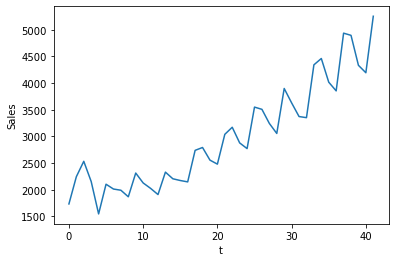

In [16]:
data1.Sales.plot()
plt.ylabel("Sales")
plt.xlabel("t")
plt.show()

Interpretation: from above fig, there is upword trend.

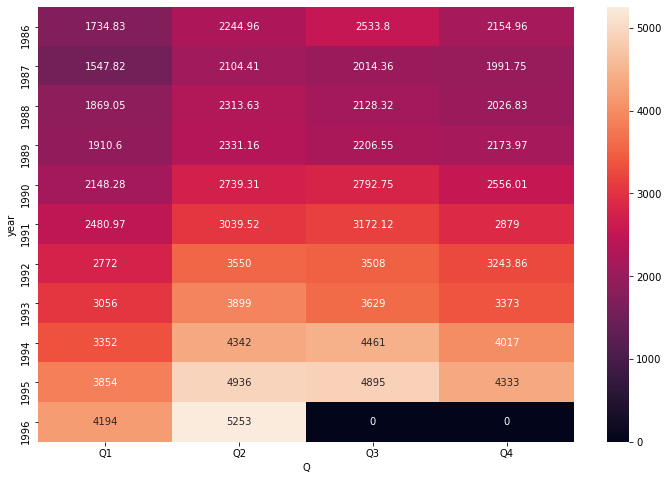

In [17]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data1,values="Sales",index="year",columns="Q",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

# Heatmap of footfalls

Interpretation: from the above fig., second quarter of 1996 has highest sales.

<AxesSubplot:xlabel='year', ylabel='Sales'>

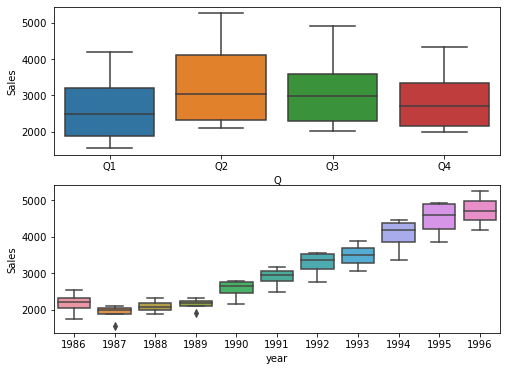

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Q",y="Sales",data=data1)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=data1)

<AxesSubplot:xlabel='year', ylabel='Sales'>

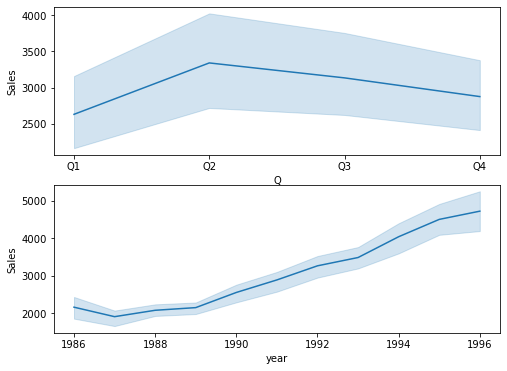

In [19]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.lineplot(x="Q",y="Sales",data=data1)
plt.subplot(212)
sns.lineplot(x="year",y="Sales",data=data1)

Interpretation: from the above plot, mamximum sales is happened in second quarter and there is continues growth in sale year by year.

In [20]:
data1.head()

,Quarter,Sales,Log_Sales,t,t_square,t_sqrt,quarter,Q,year,date,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,7.458663,1,1,1.000000,Q1 1986,Q1,1986,1986-01-01,1,0,0,0
1,Q2_86,2244.960999,7.716443,2,4,1.414214,Q2 1986,Q2,1986,1986-04-01,0,1,0,0
2,Q3_86,2533.804993,7.837477,3,9,1.732051,Q3 1986,Q3,1986,1986-07-01,0,0,1,0
3,Q4_86,2154.962997,7.675529,4,16,2.000000,Q4 1986,Q4,1986,1986-10-01,0,0,0,1
4,Q1_87,1547.818996,7.344602,5,25,2.236068,Q1 1987,Q1,1987,1987-01-01,1,0,0,0


#### Splitting data

In [21]:
Train = data1.head(38)
Test = data1.tail(4)

## Forecasting Model Based Methods

In [22]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.5532957223963

In [23]:
#Exponential

Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


466.24797310672346

In [24]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183518315095

In [25]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547276

In [26]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.7380071934617

In [27]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.389640077973

In [28]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

225.52439049818733

In [29]:
#multiplicative seasonality with quadratic trend
Mul_Quad= smf.ols('Log_Sales~t+t_square+Q1+Q2+Q3',data=Train).fit()
pred_Mul_quad= pd.Series(Mul_Quad.predict(Test[['t','t_square','Q1','Q2','Q3']]))
rmse_Mul_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mul_quad)))**2))
rmse_Mul_quad

581.8457187955227

In [30]:
#Compare the results 

data = {"MODEL":pd.Series(["Linear Model","Exponential","Quadratic","Additive seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Multiplicative Additive Seasonality ","multiplicative seasonality with quadratic trend"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mul_quad]),"Dummy_Variables":pd.Series(["--","--","--","Q1, Q2, Q3","Q1, Q2, Q3","Q1, Q2, Q3","Q1, Q2, Q3","Q1, Q2, Q3"])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,Dummy_Variables
6,Multiplicative Additive Seasonality,225.524390,"Q1, Q2, Q3"
4,Additive Seasonality Quadratic,301.738007,"Q1, Q2, Q3"
1,Exponential,466.247973,--
2,Quadratic,475.561835,--
7,multiplicative seasonality with quadratic trend,581.845719,"Q1, Q2, Q3"
0,Linear Model,591.553296,--
3,Additive seasonality,1860.023815,"Q1, Q2, Q3"
5,Multiplicative Seasonality,1963.389640,"Q1, Q2, Q3"


#### Interpretation: From above table,"Multiplicative Additive Seasonality Model" with lowest RMSE value (225.524390) is best to do forecasting 

## Forecasting Data Driven Model

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Moving Average

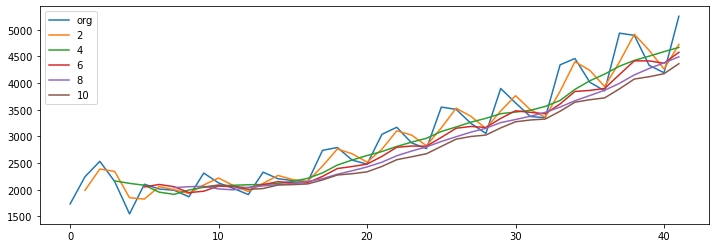

In [32]:
plt.figure(figsize=(12,4))
data1.Sales.plot(label="org")
for i in range(2,12,2):
    data1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time series decomposition plot 


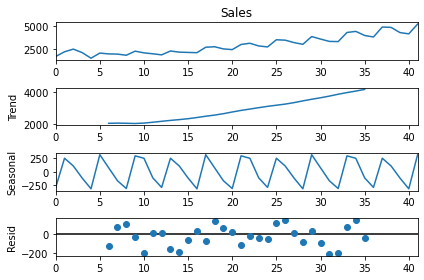

In [33]:
decompose_ts_add = seasonal_decompose(data1.Sales,period=12)
decompose_ts_add.plot()
plt.show()

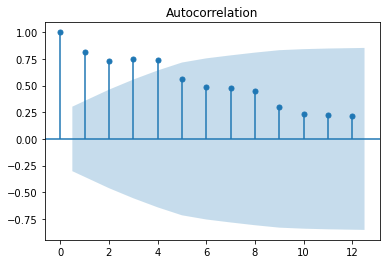

In [34]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.Sales,lags=12)
plt.show()


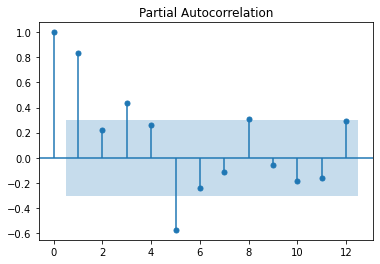

In [35]:
tsa_plots.plot_pacf(data1.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [36]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [37]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\1234\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


13.169736658156928

### Holt method 

In [38]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  


12.36193419768458

### Holts winter exponential smoothing with additive seasonality and additive trend


In [39]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

5.372853597022675

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [40]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.813804055278071

## Final Model by combining train and test

In [41]:
hwe_model_mul_add = ExponentialSmoothing(data1["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [42]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

42    4923.778390
43    4597.876931
44    4541.125613
45    5764.608179
46    5817.624243
47    5219.873527
48    4963.354682
49    6236.388074
50    6095.438034
51    5504.304477
dtype: float64

# ARIMA Model

In [43]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [44]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",engine='openpyxl')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [45]:
data['quarter']=0
for i in range(42):
    q=data['Quarter'][i]
    data['quarter'][i]=q[0:2]+" "+"19"+q[3:5]
data.head()

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1234\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [46]:
data['date'] = pd.to_datetime([f'{x[-4:]}{x[:2]}' for x in data['quarter']])
Modified_data=data.drop(["Quarter","quarter"],axis=1)

In [47]:
Modified_data=Modified_data[["date"]+["Sales"]]
Modified_data=Modified_data.set_index(keys=["date"],drop=True)
Modified_data.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [48]:
Modified_data.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='date', freq=None)

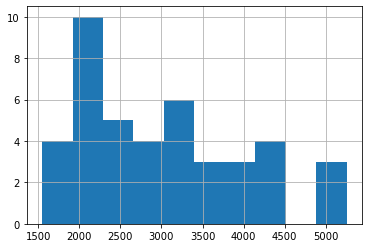

In [49]:
data["Sales"].hist()
plt.show()

<AxesSubplot:ylabel='Density'>

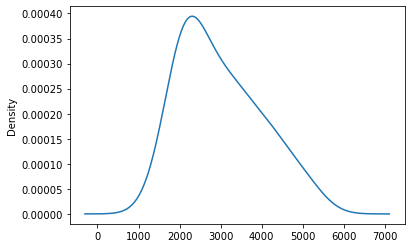

In [50]:
data["Sales"].plot(kind='kde')

In [51]:
# separate out a validation dataset
split_point = len(Modified_data) - 10
dataset, validation = Modified_data[0:split_point], Modified_data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_Cocola.csv', header=False)
validation.to_csv('validation_Cocola.csv', header=False)

Dataset 32, Validation 10


#### Persistence/ Base model

In [52]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset_Cocola.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values


In [53]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [54]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


#### ARIMA Hyperparameters

In [55]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values


In [56]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [57]:
# load dataset
train = read_csv('dataset_Cocola.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=840.936
ARIMA(0, 0, 1) RMSE=617.895
ARIMA(0, 0, 2) RMSE=450.667
ARIMA(0, 1, 0) RMSE=389.741
ARIMA(0, 1, 1) RMSE=396.142
ARIMA(0, 1, 2) RMSE=354.964
ARIMA(0, 1, 3) RMSE=317.291
ARIMA(0, 1, 4) RMSE=272.865
ARIMA(0, 2, 0) RMSE=593.232
ARIMA(0, 2, 1) RMSE=414.859
ARIMA(0, 2, 2) RMSE=346.962
ARIMA(0, 2, 3) RMSE=351.801
ARIMA(1, 0, 0) RMSE=470.350
ARIMA(1, 1, 0) RMSE=387.223
ARIMA(1, 2, 0) RMSE=574.839
ARIMA(2, 0, 0) RMSE=493.074
ARIMA(2, 1, 0) RMSE=300.157
ARIMA(2, 2, 0) RMSE=485.191
ARIMA(3, 0, 0) RMSE=428.582
ARIMA(3, 1, 0) RMSE=245.267
ARIMA(3, 2, 0) RMSE=156.907
ARIMA(4, 1, 0) RMSE=163.619
ARIMA(4, 2, 0) RMSE=161.799
Best ARIMA(3, 2, 0) RMSE=156.907


In [58]:
train

0
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
Name: 1, dtype: float64

#### Build Model based on the optimized values

In [59]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [60]:
# load data
#train = read_csv('dataset_Cocola.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [61]:
X

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    ], dtype=float32)

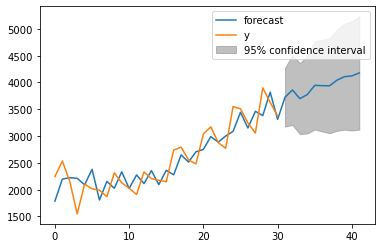

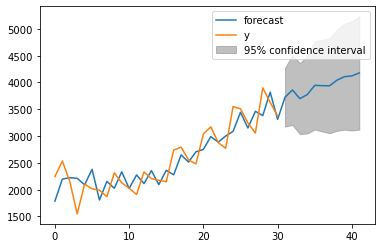

In [62]:
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 42)

In [63]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = np.sqrt(mean_squared_error(val[1], forecast))
rmse

3326.5405992453593

In [64]:
forecast

array([3726.86484262, 3859.4796902 , 3698.40908158, 3774.3271793 ,
       3946.16974402, 3940.43688488, 3938.31453975, 4042.91762704,
       4108.09656761, 4122.12717055])